In [1]:
from detectors import GPDCAnomalies
from linear_pa import ScaleFreeDiGraph
import embeddings
import typing as tp

import networkx as nx
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(42)
random.seed(42)

We will try $(\alpha, \beta, \gamma) \in \{(0.15, 0.8, 0.05),(0.1, 0.5, 0.4), (0.6, 0.1, 0.3)\}$ and $\delta_{in}=\delta_{out}=1$.

Snapshots are fixed after exactly 100 steps of evolution.

The initial graph is obtained by 1000 steps of evolution.

In [3]:
alphas = [0.15, 0.1, 0.6]
betas = [0.8, 0.5, 0.1]
gammas = [0.05, 0.4, 0.3]

delta_in = delta_out = 1

In [4]:
init_steps = 1000
steps = 100

# The influence of $\alpha$ parameter in GPDC

Let us fix evolution parameters $(0.1, 0.5, 0.4)$ and we will try $\alpha \in \{0.01, 0.05, 0.1\}$ for GPDC.

In [5]:
gpdc_alpha = [0.01, 0.05, 0.1]

In [6]:
def parameters_tuning(tail_size_ratio, evolution_ind):
    anomalies_ratios = [[], [], []]

    init_graph = nx.MultiDiGraph()
    init_graph.add_node(0)
    graph = ScaleFreeDiGraph(init_graph=init_graph)
    graph.grow(steps=init_steps,
               alpha=alphas[evolution_ind],
               beta=betas[evolution_ind],
               gamma=gammas[evolution_ind], delta_in=delta_in, delta_out=delta_out)
    
    detectors = [
        GPDCAnomalies(init_graph=graph.get_graph(),
                      embedding_class=embeddings.PageRankMLM,
                      tail_size_ratio=tail_size_ratio, alpha=gpdc_alpha[i])
        for i in range(3)
    ]
    
    for j in range(200):
        graph.grow(steps=steps,
                   alpha=alphas[evolution_ind],
                   beta=betas[evolution_ind],
                   gamma=gammas[evolution_ind], delta_in=delta_in, delta_out=delta_out)
        for i in range(3):
            anomalies = detectors[i].update(graph.get_graph())
            anomalies_ratios[i].append(len(anomalies) / len(graph.get_graph()))

    return anomalies_ratios

In [7]:
def parameters_tuning_plot(ratios, filename: str | None = None):
    ts = init_steps + np.arange(steps, 200 * steps + 1, steps)

    plt.figure(figsize=(12, 7))
    
    c = ['k', '0.3', '0.6']
    for i in range(3):
        plt.plot(ts, ratios[i], c=c[i], linewidth=2, label=f'$\\alpha={gpdc_alpha[i]}$')
    
    plt.xlabel('Evolution steps', size=20)
    plt.ylabel('Proportion of anomalies', size=20),
    
    # plt.legend()
    plt.grid(True)
    plt.tight_layout()

    if filename is not None:
        plt.savefig(filename)
    plt.show()

Let us fix evolution parameters $(0.1, 0.5, 0.4)$.

Try tail size $0.25\%$.

In [8]:
ratios = parameters_tuning(0.0025, 1)

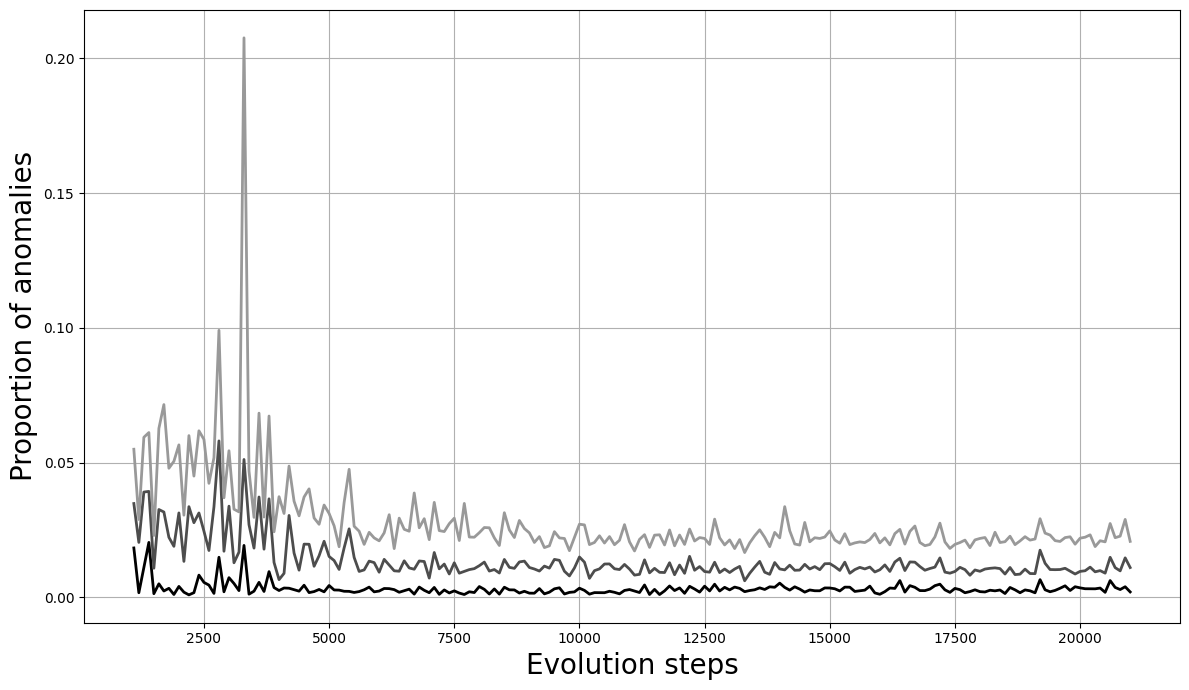

In [9]:
parameters_tuning_plot(ratios, 'img/gpdc_parameters_tuning_00025_noscale.png')

Try tail size $1\%$.

In [8]:
ratios = parameters_tuning(0.01, 1)

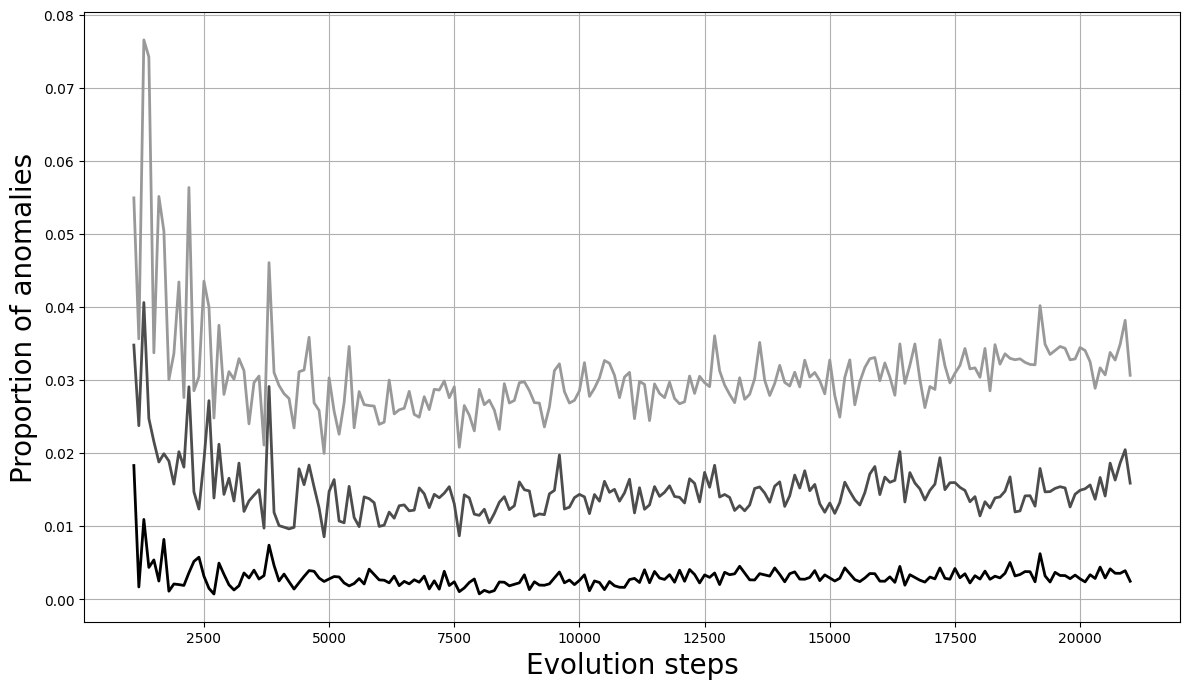

In [9]:
parameters_tuning_plot(ratios, 'img/gpdc_parameters_tuning_001_noscale.png')

Try tail size $2.5\%$.

In [8]:
ratios = parameters_tuning(0.025, 1)

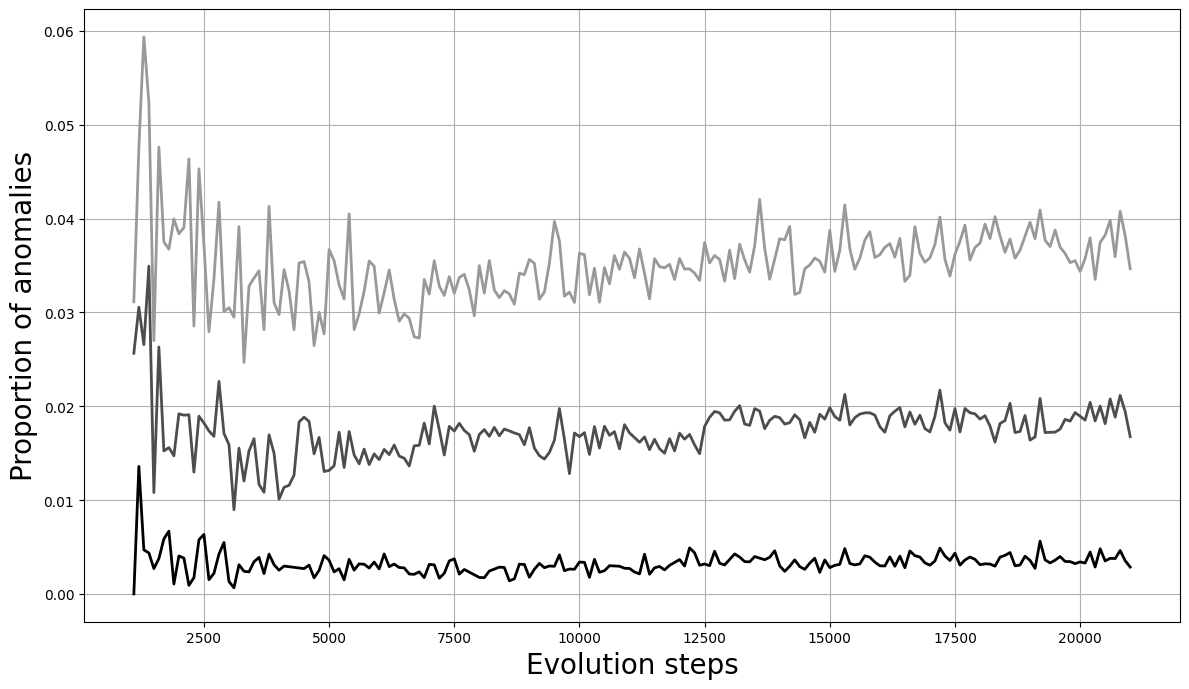

In [9]:
parameters_tuning_plot(ratios, 'img/gpdc_parameters_tuning_0025_noscale.png')